## Importing Neccessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
reg=linear_model.LinearRegression()

### Importing Neccessary Libraries

In [4]:
df=pd.read_excel("House Sales.xlsx",skiprows=2)#,skiprows=2
df.head()

C:\Users\Solowyse\anaconda3\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Region,Type,Selling Price,Lot Cost
0,Midwest,Townhouse,85145,17030
1,Midwest,Townhouse,112740,20700
2,Midwest,Townhouse,115350,18030
3,Midwest,Townhouse,116415,19600
4,Midwest,Townhouse,133070,24455


In [5]:
df.shape


(168, 4)

In [6]:
df.columns

Index(['Region', 'Type', 'Selling Price', 'Lot Cost'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Region         168 non-null    object
 1   Type           168 non-null    object
 2   Selling Price  168 non-null    int64 
 3   Lot Cost       168 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 5.4+ KB


In [8]:
df.describe()

,Selling Price,Lot Cost
count,168.000000,168.000000
mean,267330.571429,45075.696429
std,82190.401846,15452.270849
min,85145.000000,17030.000000
25%,204662.500000,33425.500000
50%,263974.000000,44560.000000
75%,324302.500000,50655.750000
max,575120.000000,85800.000000


In [9]:
df.describe(include=['object'])

,Region,Type
count,168,168
unique,2,2
top,South,Single Family
freq,113,136


In [10]:
df.describe(include=['object'])

,Region,Type
count,168,168
unique,2,2
top,South,Single Family
freq,113,136


In [11]:
df.dtypes

Region           object
Type             object
Selling Price     int64
Lot Cost          int64
dtype: object

You can see the data types and the column names matches

In [13]:
df.isna().sum()

Region           0
Type             0
Selling Price    0
Lot Cost         0
dtype: int64

You can see there is no null values in this dataset

In [15]:
#df.isnull().sum() can also used this code to check for null values

### Detecting and Removing of outliers

<Axes: >

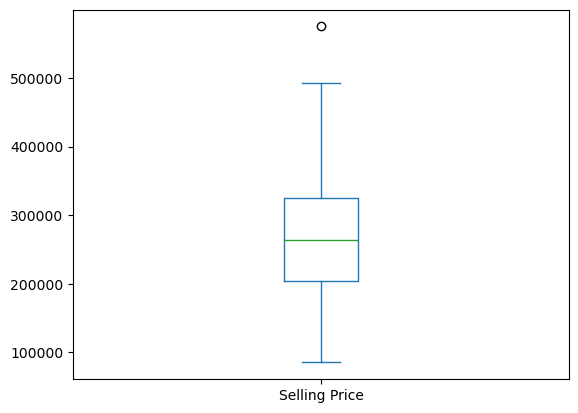

In [17]:
df['Selling Price'].plot(kind='box')

### Function used to remove outliers

In [19]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[((df[column] >= lower_bound) & (df[column] <= upper_bound))]

In [20]:
df=remove_outliers(df,"Selling Price")

### Visualization after removing the outliers

<Axes: >

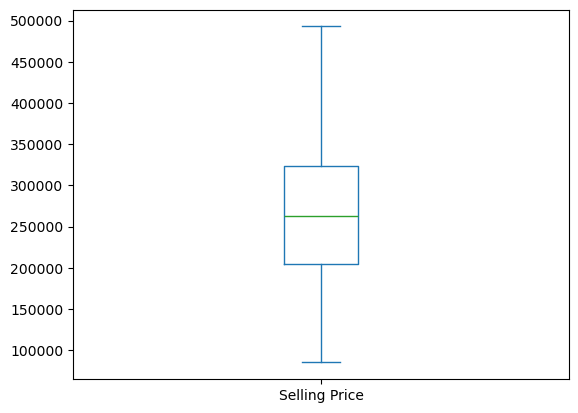

In [22]:
df['Selling Price'].plot(kind='box')

In [23]:
#Shape after removing outliers
df.shape

(167, 4)

### Checking for duplicates

In [25]:
df.duplicated().sum()

0

In [26]:
### Checking for unique values in the categorical columns

In [27]:
df['Region'].nunique()

2

In [28]:
df['Type'].nunique()

2

In [29]:
df.head(10)

,Region,Type,Selling Price,Lot Cost
0,Midwest,Townhouse,85145,17030
1,Midwest,Townhouse,112740,20700
2,Midwest,Townhouse,115350,18030
3,Midwest,Townhouse,116415,19600
4,Midwest,Townhouse,133070,24455
5,Midwest,Single Family,136530,25500
6,Midwest,Townhouse,139435,29155
7,Midwest,Townhouse,139955,30400
8,Midwest,Townhouse,147905,24650
9,Midwest,Single Family,153845,27500


In [30]:
#Resetting of index
df.reset_index(drop=True)#,drop=True

,Region,Type,Selling Price,Lot Cost
0,Midwest,Townhouse,85145,17030
1,Midwest,Townhouse,112740,20700
2,Midwest,Townhouse,115350,18030
3,Midwest,Townhouse,116415,19600
4,Midwest,Townhouse,133070,24455
...,...,...,...,...
162,South,Single Family,417790,63099
163,South,Single Family,432426,57422
164,South,Single Family,444304,53938
165,South,Single Family,446507,75510


### Deviding the dataset in features(independent variable) and target variable(dependent variable)

In [32]:
y=df['Selling Price']

In [33]:
x = df.drop(columns=['Selling Price'])

In [34]:
x.head()

,Region,Type,Lot Cost
0,Midwest,Townhouse,17030
1,Midwest,Townhouse,20700
2,Midwest,Townhouse,18030
3,Midwest,Townhouse,19600
4,Midwest,Townhouse,24455


In [35]:
y.head()

0     85145
1    112740
2    115350
3    116415
4    133070
Name: Selling Price, dtype: int64

### Diving data in training and testin dataset

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=10)

In [39]:
print(len(x_train))

133


In [40]:
print(len(x_test))

34


### Using One Hot Encoder to encode categorical columns

In [42]:
from sklearn.preprocessing import  OneHotEncoder

In [43]:
ohe = OneHotEncoder(sparse=False,drop="first")

In [44]:
x_train_new=ohe.fit_transform(x_train[['Region','Type']])

C:\Users\Solowyse\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [45]:
x_test_new=ohe.fit_transform(x_test[['Region','Type']])

C:\Users\Solowyse\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [46]:
x_train_new.shape

(133, 2)

In [47]:
x_train_concat=np.hstack((x_train_new,x_train['Lot Cost'].values.reshape(-1,1)))
x_test_concat=np.hstack((x_test_new,x_test['Lot Cost'].values.reshape(-1,1)))

In [48]:
### Model Fitting

In [49]:
reg.fit(x_train_concat,y_train)

LinearRegression()

### Model testing

In [51]:
reg.score(x_test_concat,y_test)

0.6797790381394685